### Libraries Used :

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

### 1-Load and Prepare Dataset


In [2]:
# 1. Load Data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

### 2-Data Preprocessing

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
# check for missing values
df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

### 3-Data Visualizations 


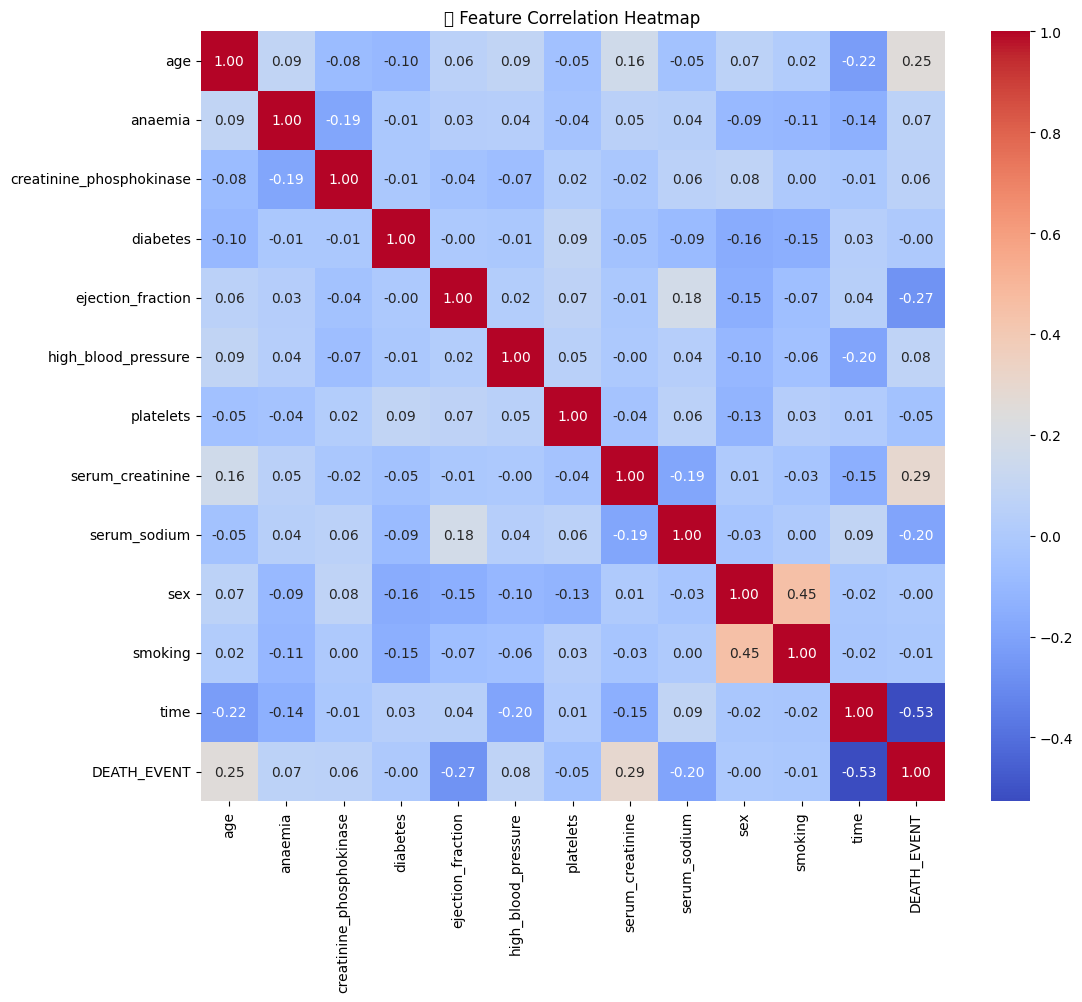

In [9]:
#1. Correlation Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔥 Feature Correlation Heatmap")
plt.show()

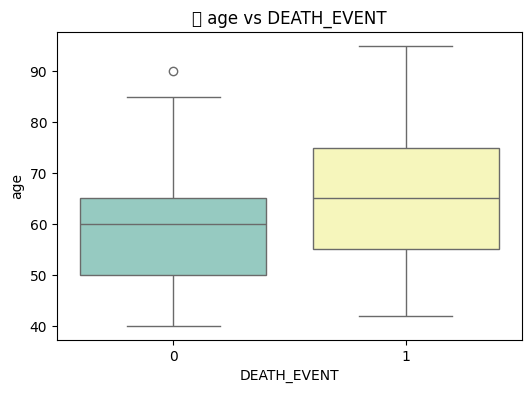

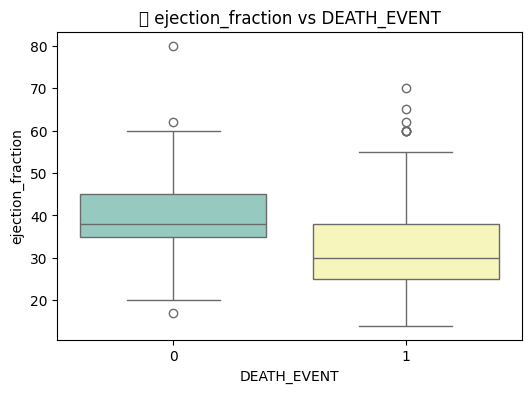

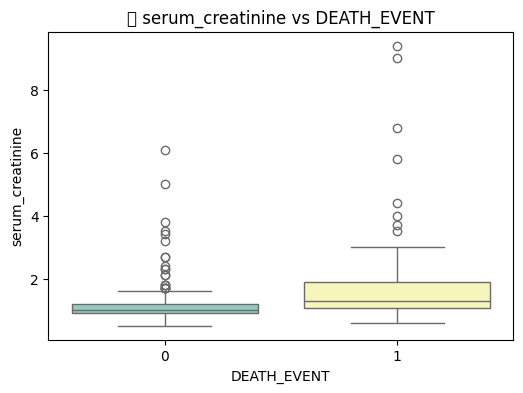

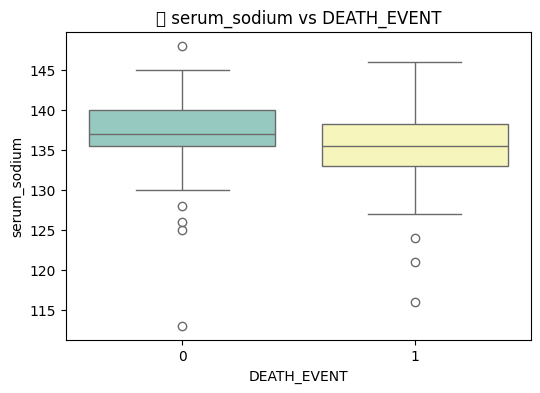

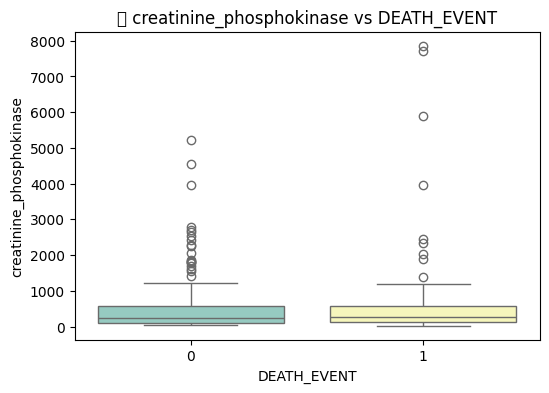

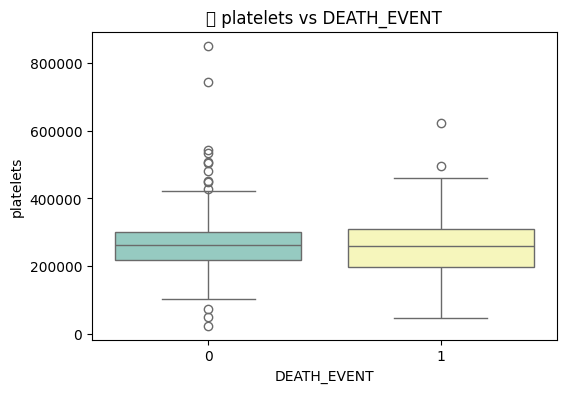

In [10]:
# 2. Boxplots: Numerical Features vs DEATH_EVENT
num_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase', 'platelets']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set3')
    plt.title(f"📦 {col} vs DEATH_EVENT")
    plt.xlabel("DEATH_EVENT")
    plt.ylabel(col)
    plt.show()

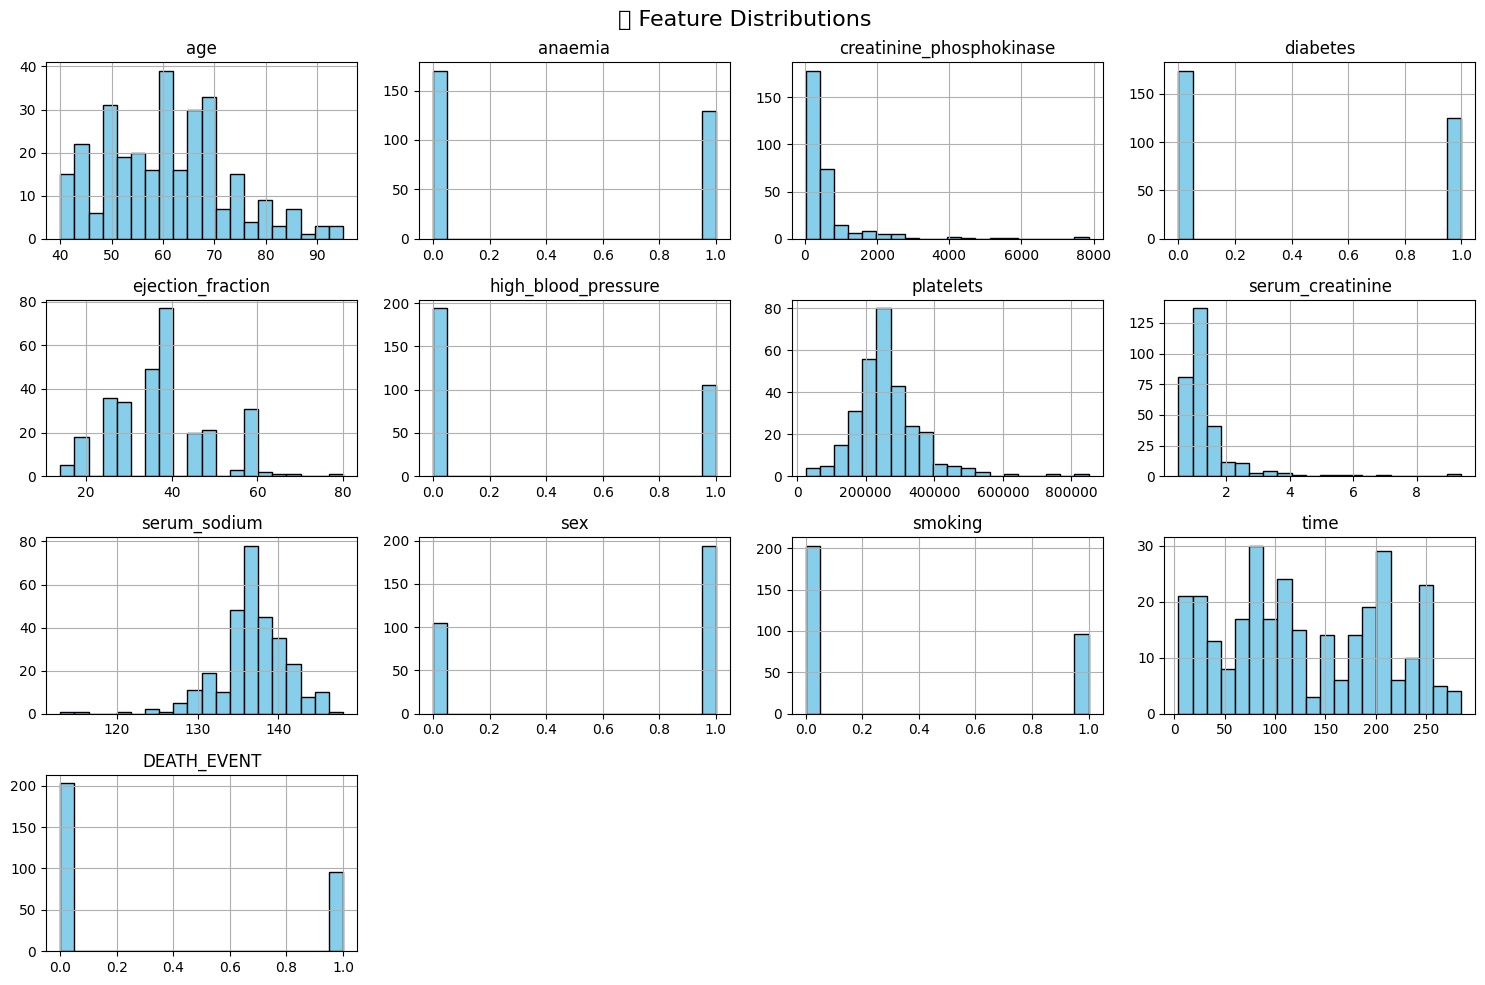

In [11]:
#  3. Histogram of All Features

df.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("📊 Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

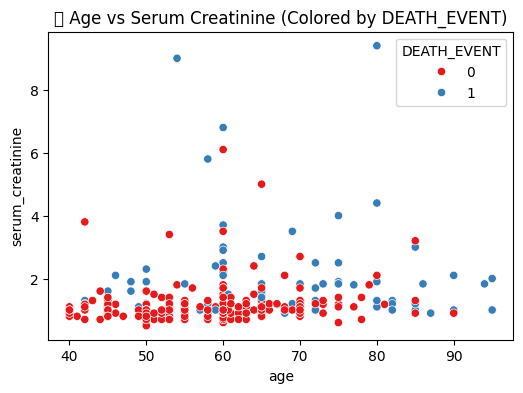

In [12]:
#4. Scatter Plot: Age vs Serum Creatinine

plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='serum_creatinine', hue='DEATH_EVENT', data=df, palette='Set1')
plt.title("📍 Age vs Serum Creatinine (Colored by DEATH_EVENT)")
plt.show()


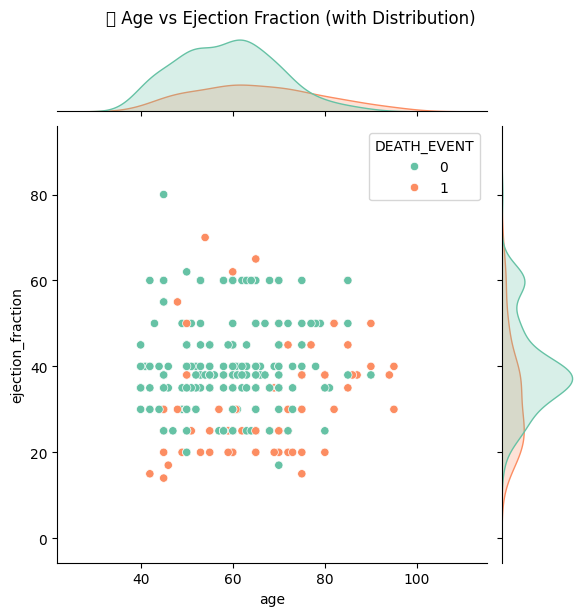

In [13]:
#  5. Jointplot: Age vs Ejection Fraction

sns.jointplot(x='age', y='ejection_fraction', data=df, kind='scatter', hue='DEATH_EVENT', palette='Set2')
plt.suptitle("📌 Age vs Ejection Fraction (with Distribution)", y=1.02)
plt.show()

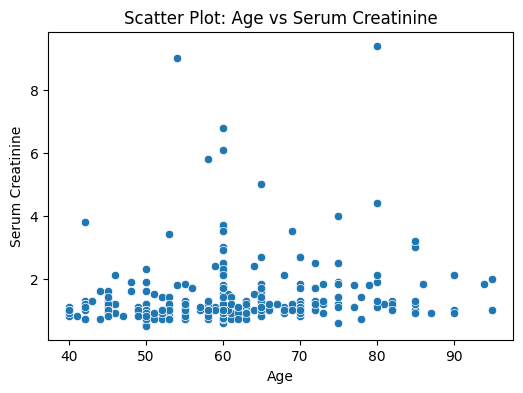

In [14]:
#  6. Scatter Plot between 'age' and a numerical feature
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='serum_creatinine', data=df)
plt.title("Scatter Plot: Age vs Serum Creatinine")
plt.xlabel("Age")
plt.ylabel("Serum Creatinine")
plt.show()

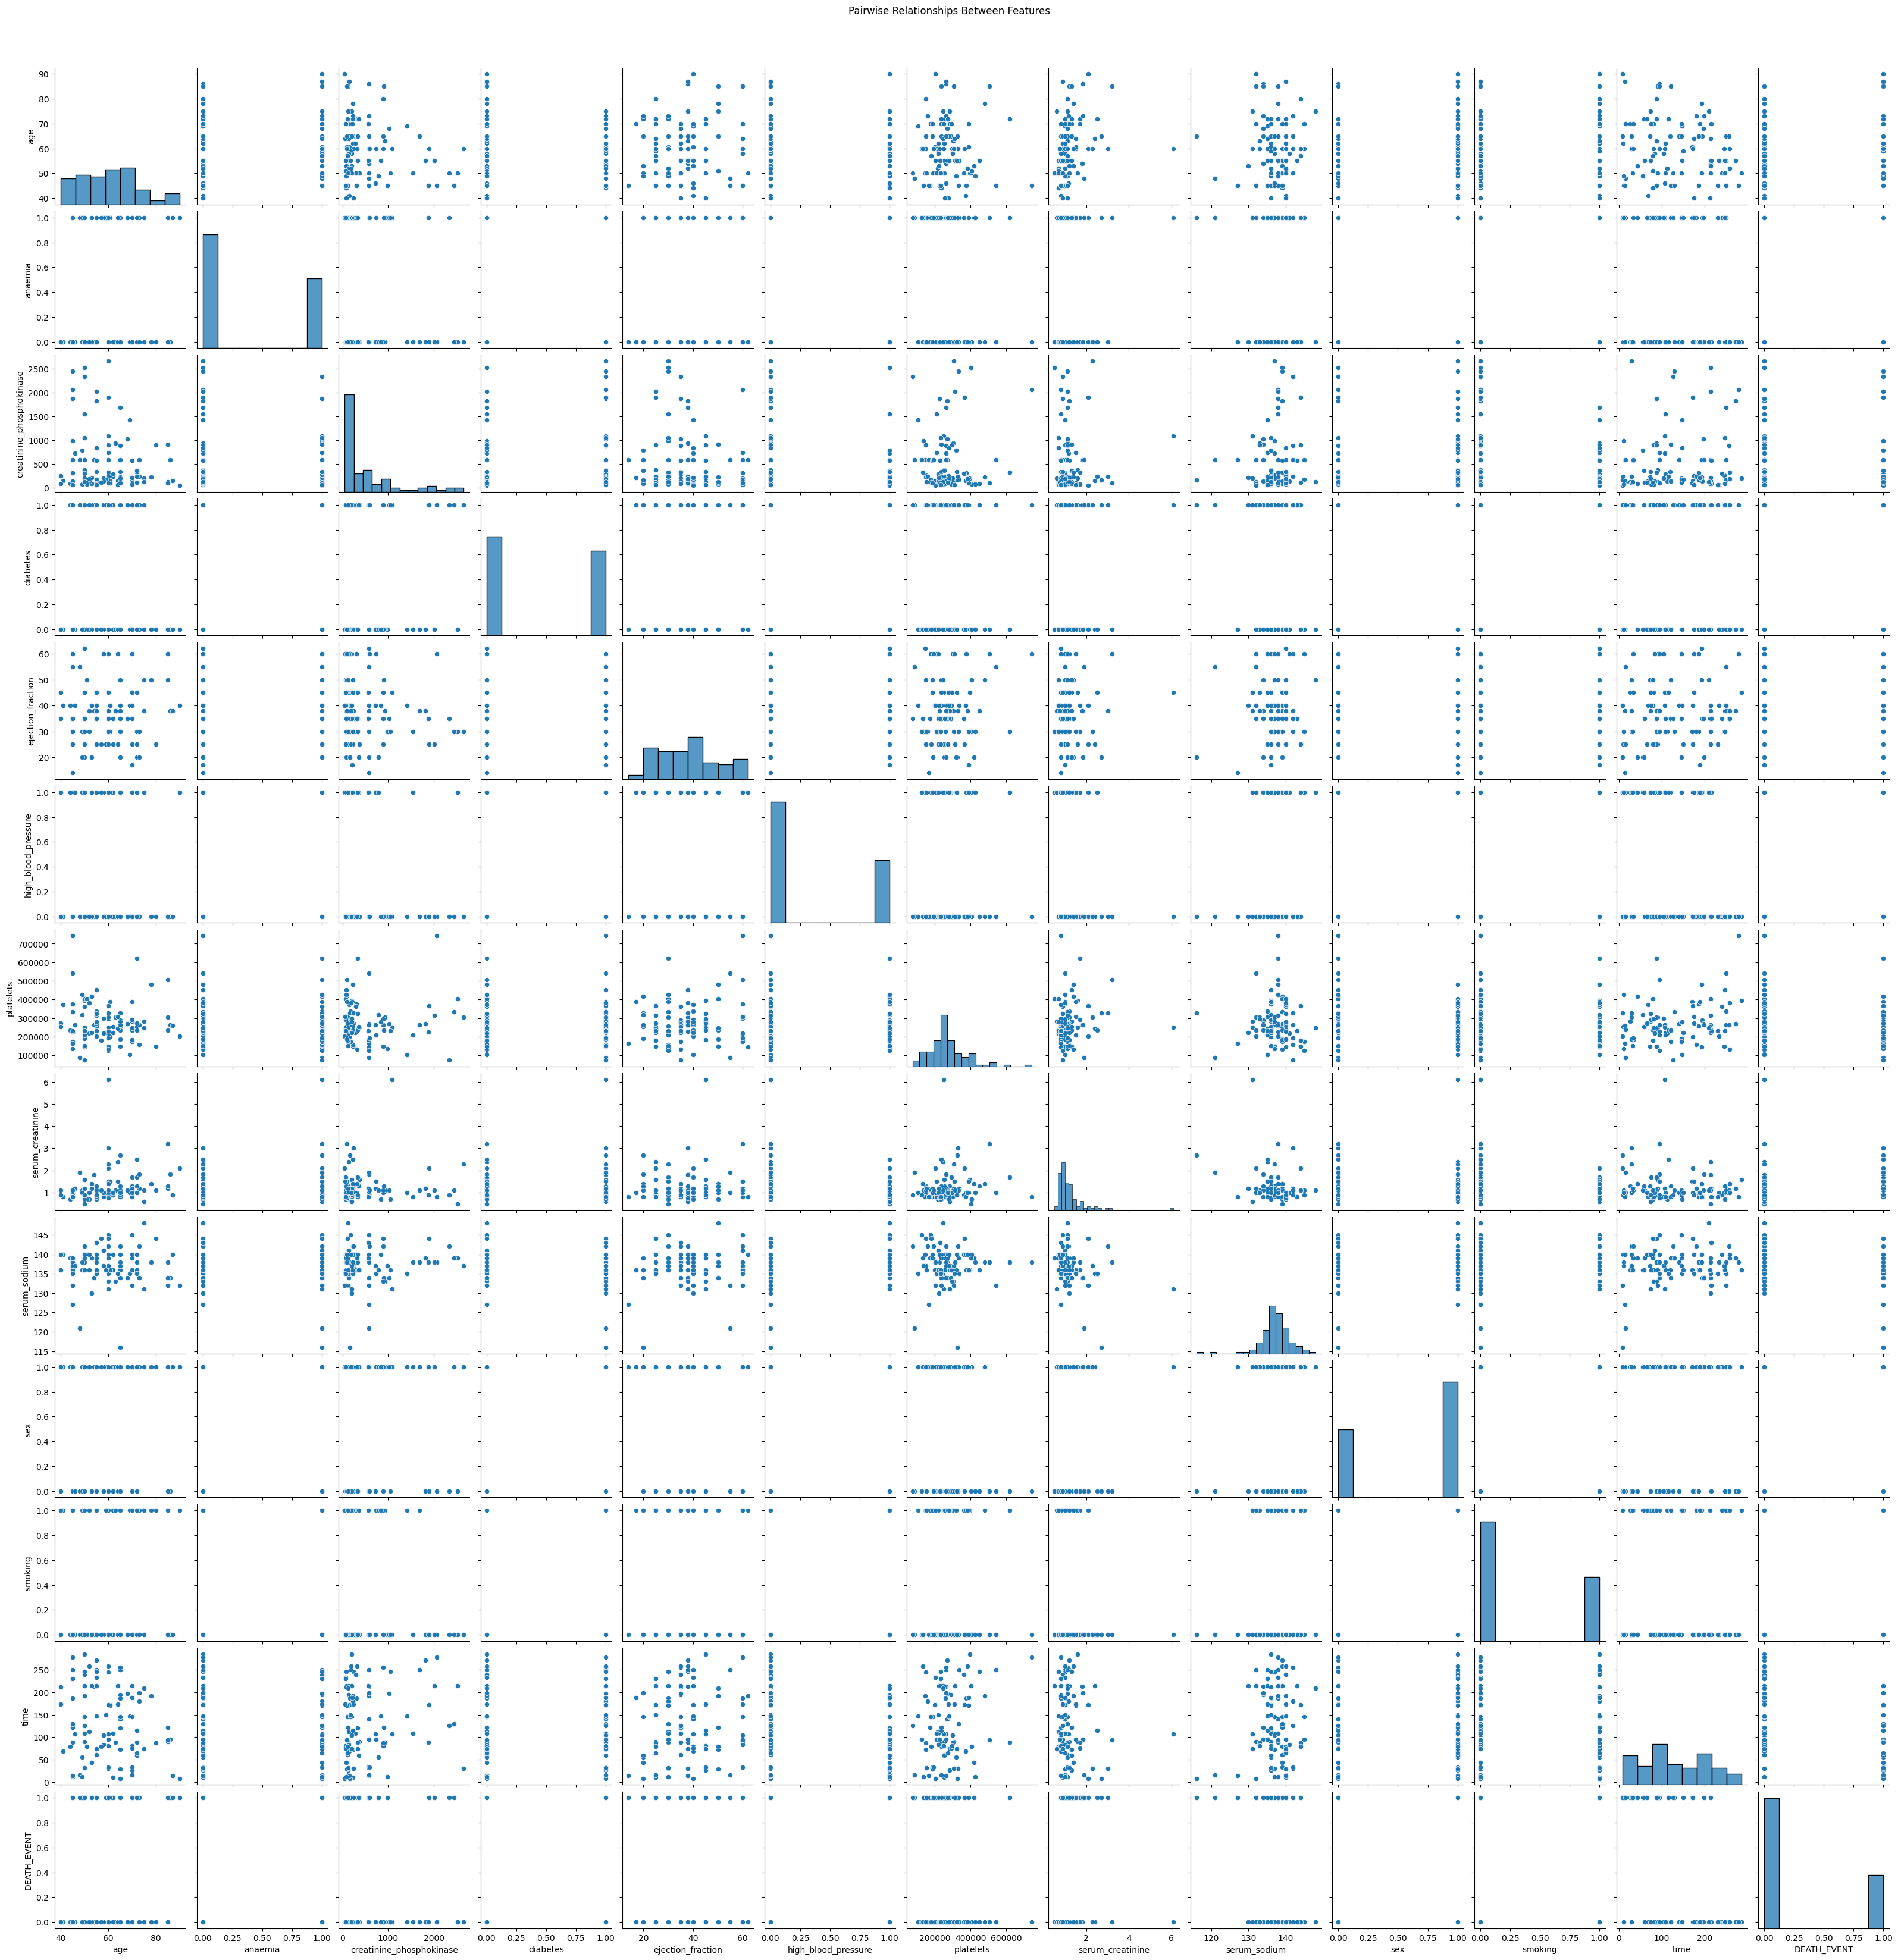

In [15]:
# 7. Pairplot for all features
sample = df.sample(100, random_state=1) if len(df) > 100 else df
sns.pairplot(data=sample)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

###  4-Add Feature Engineering


In [16]:
# 4. Feature Engineering
df["platelets_per_age"] = df["platelets"] / (df["age"] + 1)
df["creatinine_per_ck"] = df["serum_creatinine"] / (df["creatinine_phosphokinase"] + 1)
df["ejection_per_age"] = df["ejection_fraction"] / (df["age"] + 1)
df["anaemia_creatinine"] = df["anaemia"] * df["serum_creatinine"]

#  Prepare Features and Target
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

### 5-Outlier Handling

In [17]:
# 5. Outlier Removal (IQR)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < Q1 - 1.5 * IQR) | (X > Q3 + 1.5 * IQR)).any(axis=1)]
y = y.loc[X.index].reset_index(drop=True)
X = X.reset_index(drop=True)

### 6-Feature Scaling

In [18]:
# 6. Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


### 7-Smote

In [19]:
# 7. Balance Dataset with SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)


### 8-Train Model

In [20]:
# 8. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### 9-Use LightGMB Model

In [21]:
# 9. Train LightGBM Model
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 115, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 235, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489362 -> initscore=-0.042560
[LightGBM] [Info] Start training from score -0.042560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(random_state=42)

### 10- Accuracy&Classification Report

In [22]:
# 10. Predict
y_pred = model.predict(X_test)
#  Evaluation
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧠 R2 Score:", r2_score(y_test, y_pred))

🎯 Accuracy: 0.9830508474576272
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.97      1.00      0.98        32

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

🧠 R2 Score: 0.931712962962963


### 11- Confusion Matrix

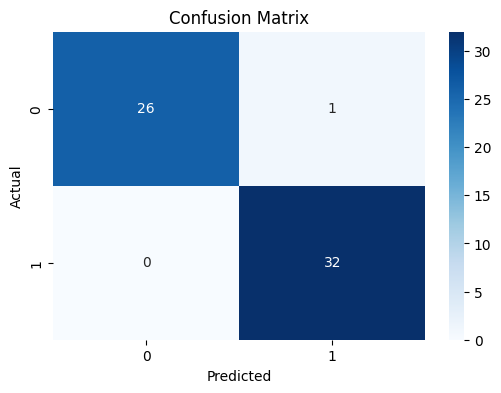

In [23]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 12-Cross Validation 

In [24]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=skf)
print("📊 Stratified CV Mean Accuracy:", scores.mean())



[LightGBM] [Info] Number of positive: 47, number of negative: 117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286585 -> initscore=-0.912026
[LightGBM] [Info] Start training from score -0.912026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### 12-Save The Model

In [25]:
# Save model
joblib.dump(model, "lightgbm_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']